Graph loaded with 4039 nodes and 88234 edges.


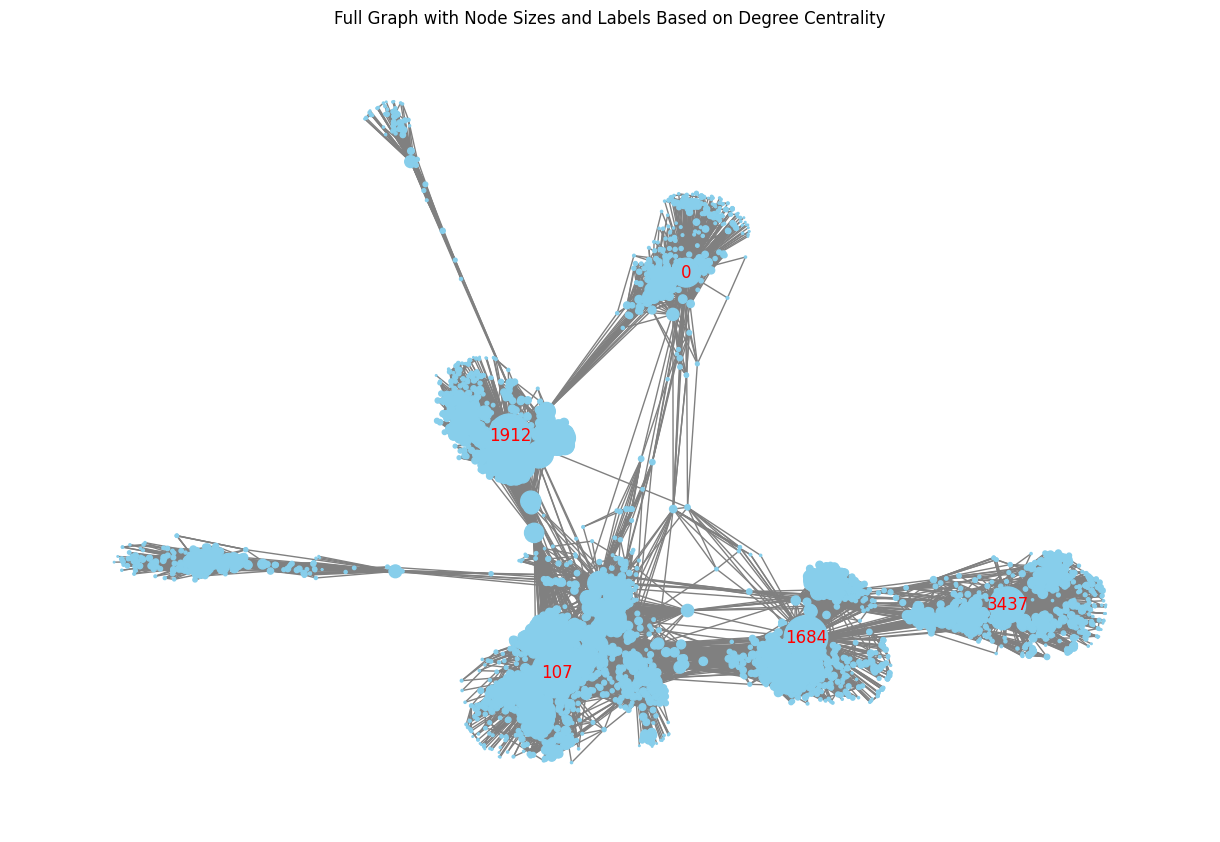

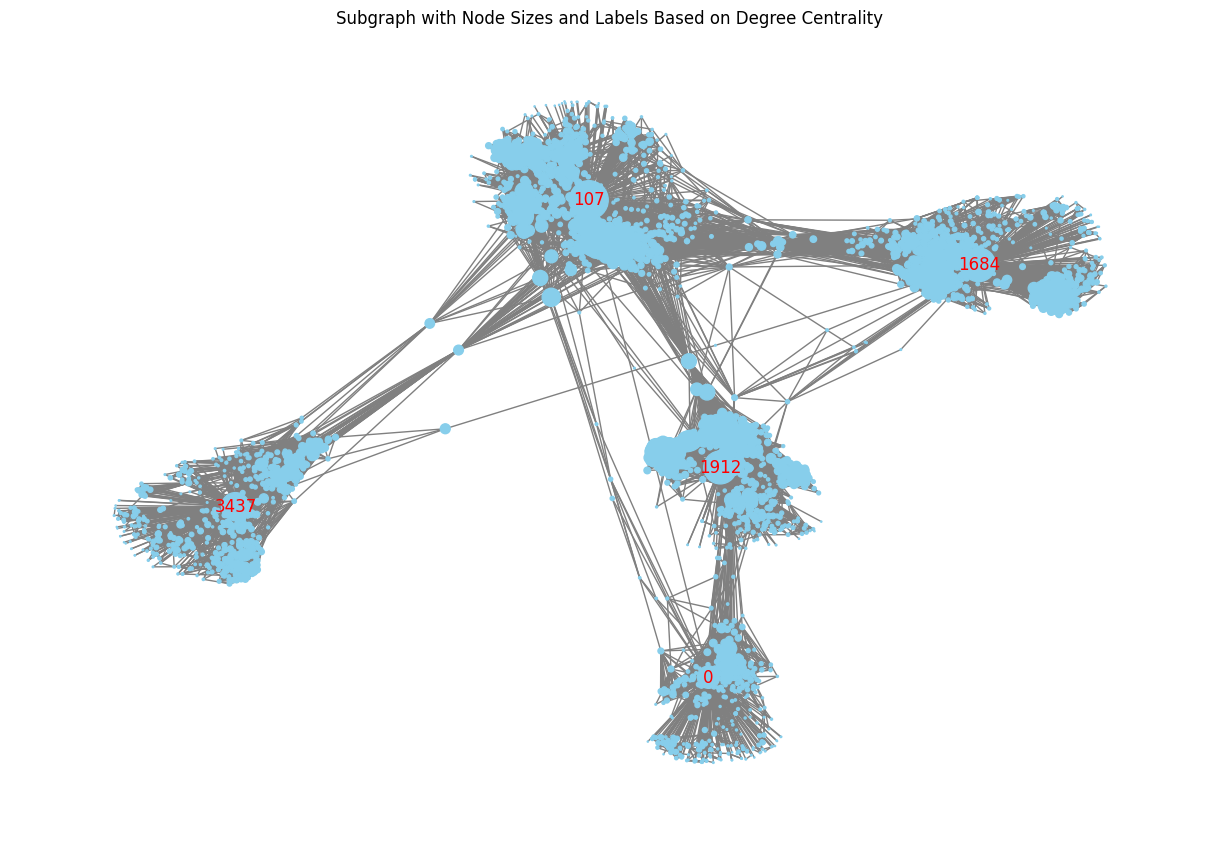

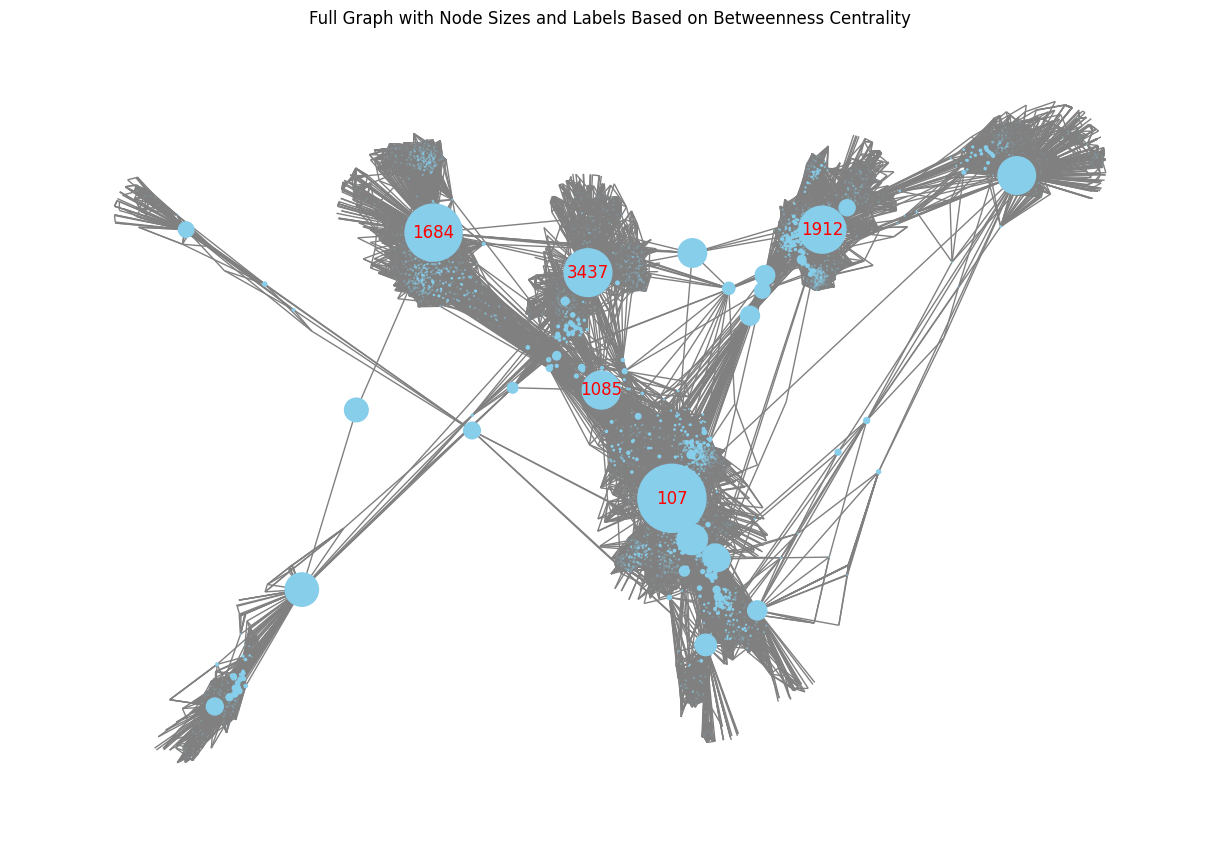

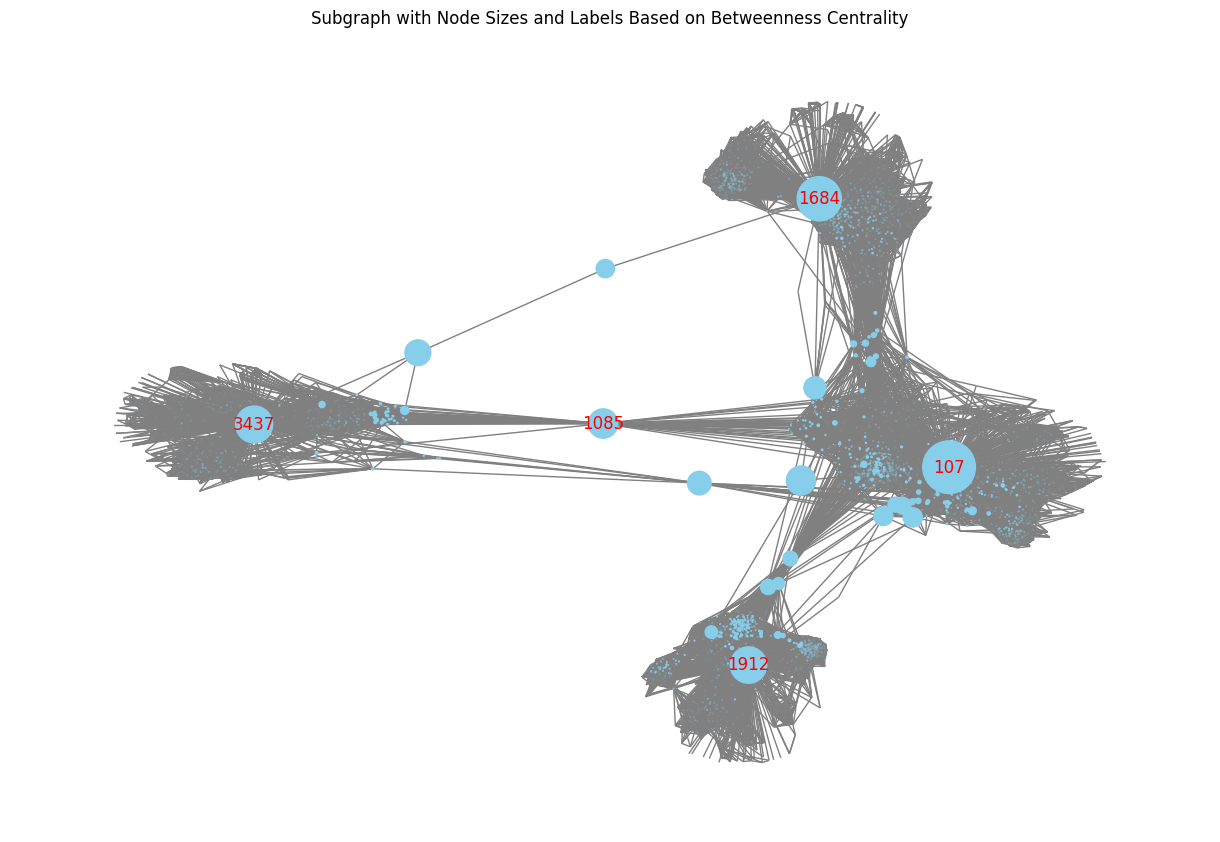

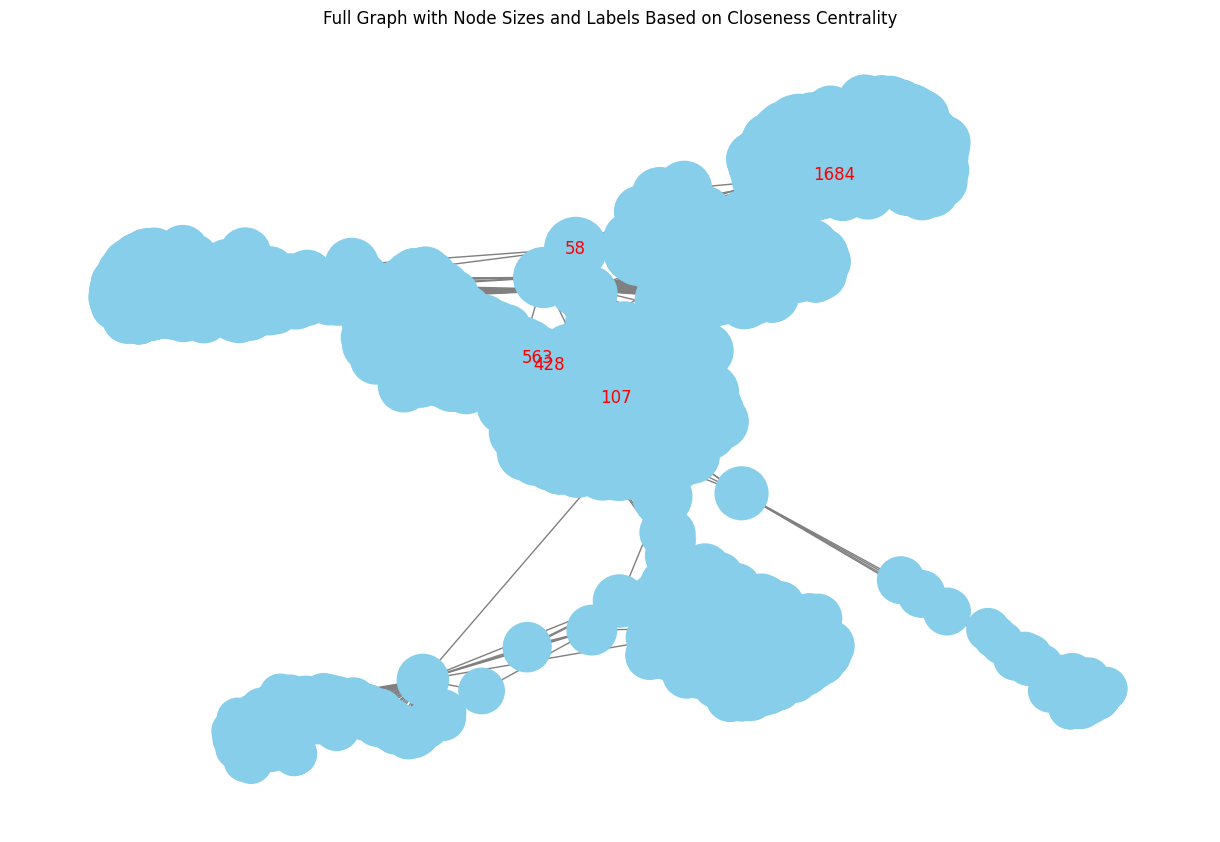

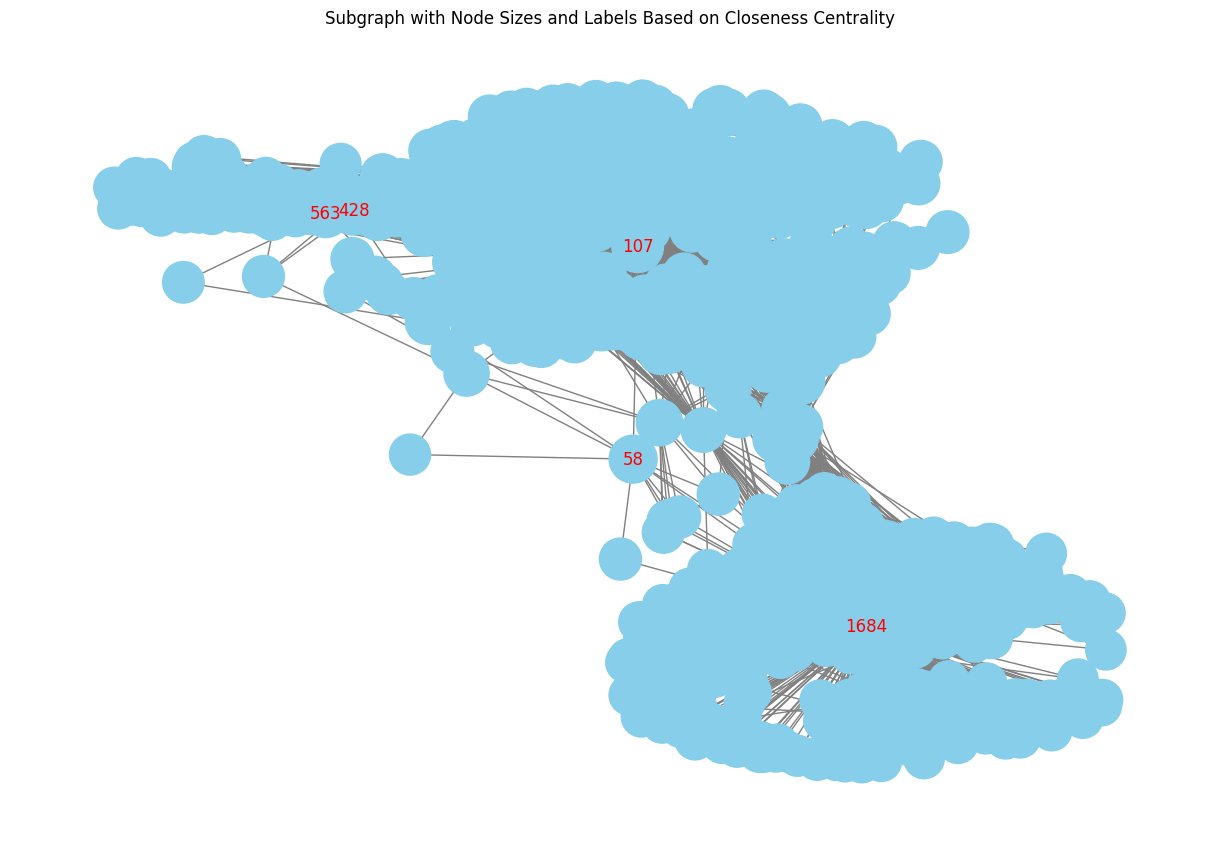

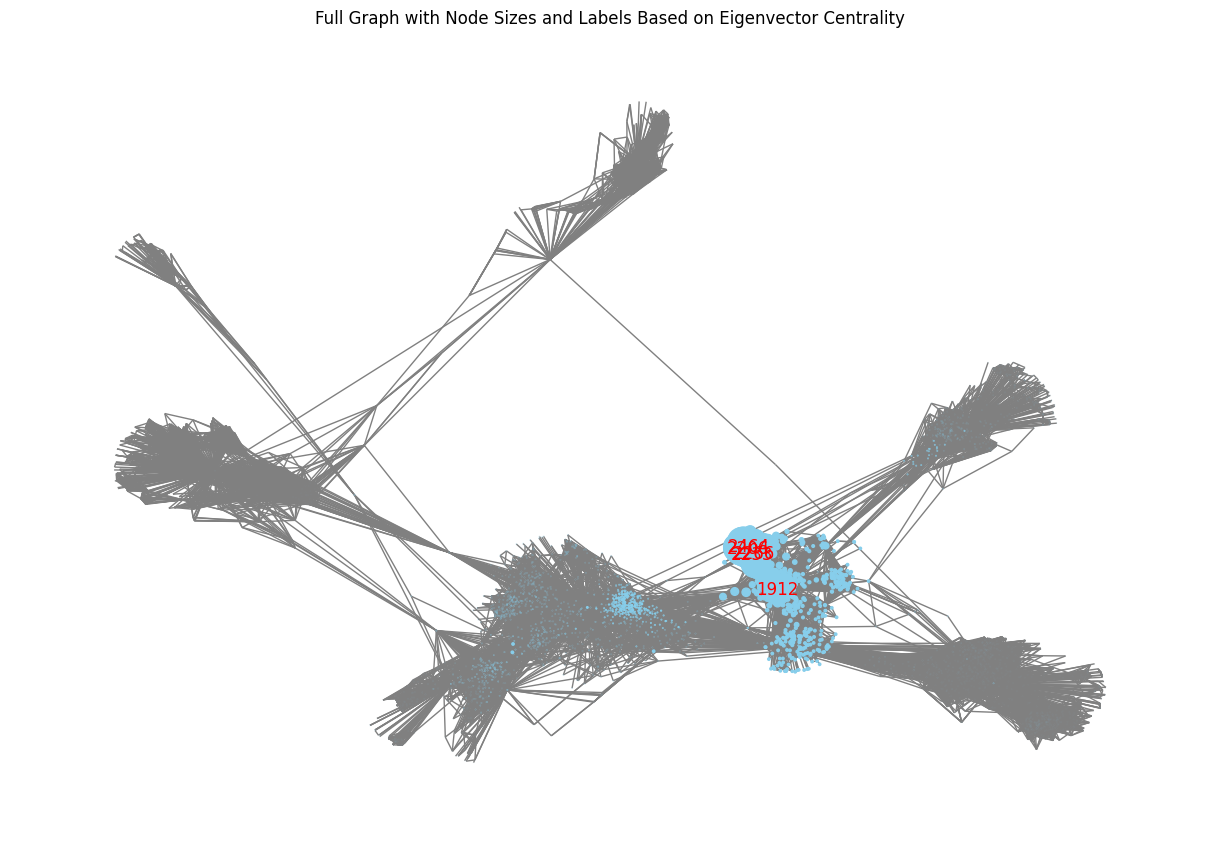

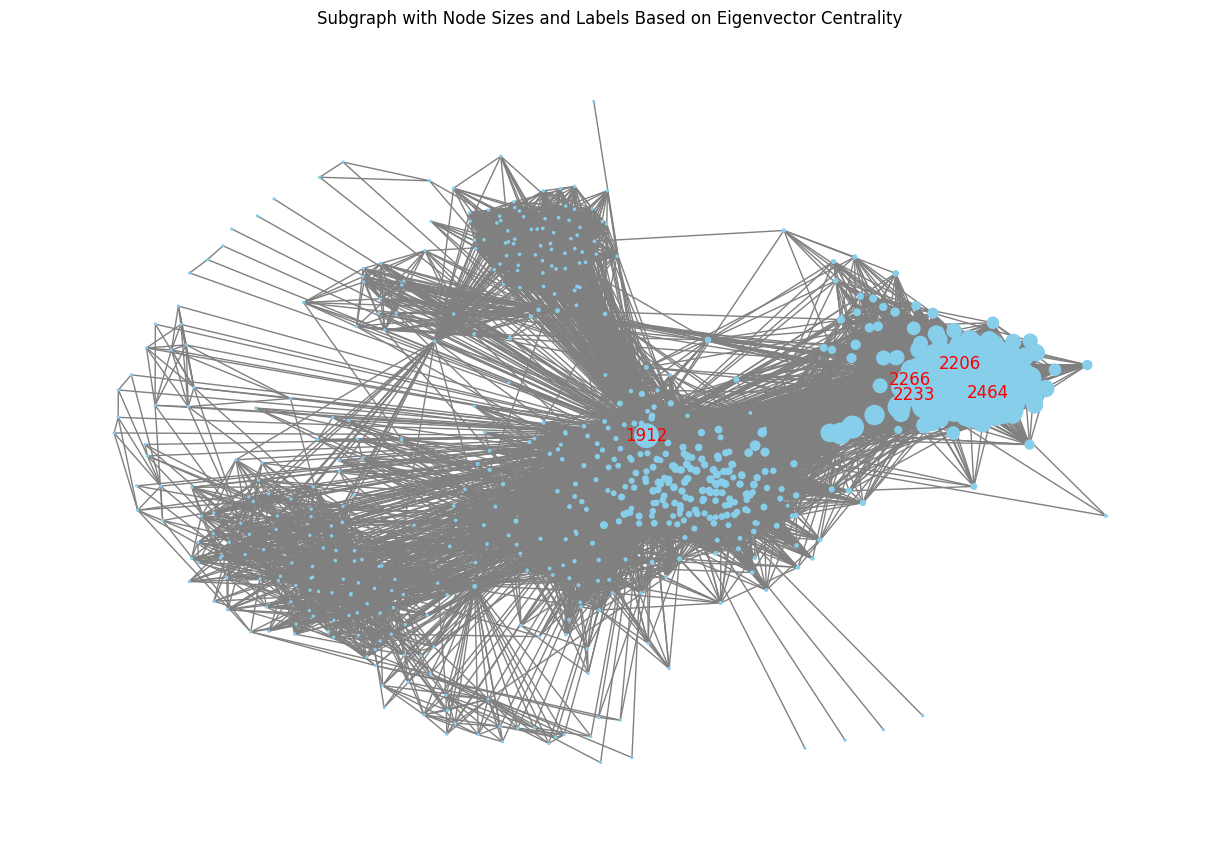

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the Facebook Social Circles Dataset
def load_facebook_graph(file_path):
    """
    Loads the Facebook Social Circles dataset into a NetworkX graph.
    :param file_path: Path to the Facebook edge list file.
    :return: A NetworkX Graph object.
    """
    try:
        # Load the edge list into a graph
        G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)
        print(f"Graph loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
        return G
    except Exception as e:
        print(f"Error loading graph: {e}")
        return None

# Step 2: Get Most Central Nodes
def get_most_central_nodes(graph, centrality, top_n=5):
    """
    Identifies the most central nodes based on a centrality measure.
    :param graph: The NetworkX graph object.
    :param centrality: Centrality measure dictionary.
    :param top_n: Number of most central nodes to return.
    :return: List of top-n central nodes.
    """
    sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    return [node for node, _ in sorted_nodes[:top_n]]

# Step 3: Visualize the Full Graph with Centrality-Based Labels
def visualize_full_graph_with_labels(graph, centrality, centrality_name, top_n=5):
    """
    Visualize the full graph with labels for the most central nodes.
    :param graph: The NetworkX graph object.
    :param centrality: Centrality measure dictionary.
    :param centrality_name: Name of the centrality metric.
    :param top_n: Number of most central nodes to label.
    """
    # Identify most central nodes
    important_nodes = get_most_central_nodes(graph, centrality, top_n=top_n)

    # Scale node sizes based on centrality
    sizes = [5000 * centrality[node] for node in graph.nodes()]
    pos = nx.spring_layout(graph)

    plt.figure(figsize=(12, 8))
    # Draw nodes and edges
    nx.draw(
        graph,
        pos,
        with_labels=False,
        node_size=sizes,
        node_color="skyblue",
        edge_color="gray",
    )

    # Add labels for the most central nodes
    labels = {node: str(node) for node in important_nodes}
    nx.draw_networkx_labels(graph, pos, labels, font_size=12, font_color="red")

    plt.title(f"Full Graph with Node Sizes and Labels Based on {centrality_name}")
    plt.show()

# Step 4: Visualize Subgraph with Centrality-Based Labels
def visualize_subgraph_with_labels(graph, centrality, centrality_name, top_n=5):
    """
    Visualize a subgraph with labels for the most central nodes.
    :param graph: The NetworkX graph object.
    :param centrality: Centrality measure dictionary.
    :param centrality_name: Name of the centrality metric.
    :param top_n: Number of most central nodes to label.
    """
    # Identify most central nodes
    important_nodes = get_most_central_nodes(graph, centrality, top_n=top_n)

    # Create a subgraph with only important nodes and their neighbors
    subgraph_nodes = set(important_nodes)
    for node in important_nodes:
        subgraph_nodes.update(graph.neighbors(node))
    subgraph = graph.subgraph(subgraph_nodes)

    # Visualize the subgraph
    sizes = [3000 * centrality[node] if node in centrality else 100 for node in subgraph.nodes()]
    pos = nx.spring_layout(subgraph)
    plt.figure(figsize=(12, 8))

    # Draw nodes and edges
    nx.draw(
        subgraph,
        pos,
        with_labels=False,
        node_size=sizes,
        node_color="skyblue",
        edge_color="gray",
    )

    # Add labels for the most central nodes
    labels = {node: str(node) for node in important_nodes}
    nx.draw_networkx_labels(subgraph, pos, labels, font_size=12, font_color="red")

    plt.title(f"Subgraph with Node Sizes and Labels Based on {centrality_name}")
    plt.show()

# Step 5: Main Execution
if __name__ == "__main__":
    # Path to the Facebook edge list file
    file_path = "facebook_combined.txt"  # Ensure the file is in the same directory or provide the correct path.

    # Load the graph
    facebook_graph = load_facebook_graph(file_path)

    if facebook_graph:
        # Analyze all centrality measures
        centrality_measures = {
            "Degree Centrality": nx.degree_centrality(facebook_graph),
            "Betweenness Centrality": nx.betweenness_centrality(facebook_graph),
            "Closeness Centrality": nx.closeness_centrality(facebook_graph),
            "Eigenvector Centrality": nx.eigenvector_centrality(facebook_graph),
        }

        # Visualize full graph and subgraph for each centrality measure
        for name, centrality in centrality_measures.items():
            # Full graph visualization
            visualize_full_graph_with_labels(
                facebook_graph,
                centrality,
                centrality_name=name,
                top_n=5,
            )

            # Subgraph visualization
            visualize_subgraph_with_labels(
                facebook_graph,
                centrality,
                centrality_name=name,
                top_n=5,
            )
